In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dia=pd.read_csv('/content/diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dia.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dia.shape

(768, 9)

In [10]:
a=dia.iloc[:,[1,4,5]].values
print(a)

[[148.    0.   33.6]
 [ 85.    0.   26.6]
 [183.    0.   23.3]
 ...
 [121.  112.   26.2]
 [126.    0.   30.1]
 [ 93.    0.   30.4]]


In [11]:
d=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmean.fit(a)
  d.append(kmean.inertia_)

In [13]:
kmean=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmean.fit_predict(a)
print(y_pred)

[1 1 1 2 2 1 2 1 0 1 1 1 1 0 2 1 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 0 0 1 0 2 1 2 1 1 1 2 1 1 1 1 1 2 2 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 2
 0 1 1 2 1 1 1 1 1 2 1 2 1 1 2 2 2 2 1 2 1 2 1 1 2 1 2 1 0 1 1 1 1 0 1 1 2
 1 1 2 1 2 0 1 1 2 2 1 2 1 2 0 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1
 1 0 1 2 2 1 2 1 1 1 2 1 1 2 0 1 1 1 1 2 1 0 1 2 1 1 1 1 2 2 2 2 2 1 1 0 1
 1 2 1 1 1 1 0 1 1 0 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 0 0 1 1 1 1 1 2 1 1 1 0
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 0 2 1 1 1 1 2 2 1 2
 0 2 2 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 1 1 1 2 2 1 2 1 1 1 1
 1 1 2 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 0 1 1 1 0 1 1 1 1 2
 0 2 1 2 2 0 1 1 1 1 1 1 2 1 2 1 1 1 0 1 2 1 0 2 1 2 2 1 1 1 1 1 2 1 1 2 1
 1 1 0 1 2 0 1 2 0 1 1 1 2 2 1 1 1 2 0 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 0
 1 1 2 1 2 0 2 1 1 1 1 1 

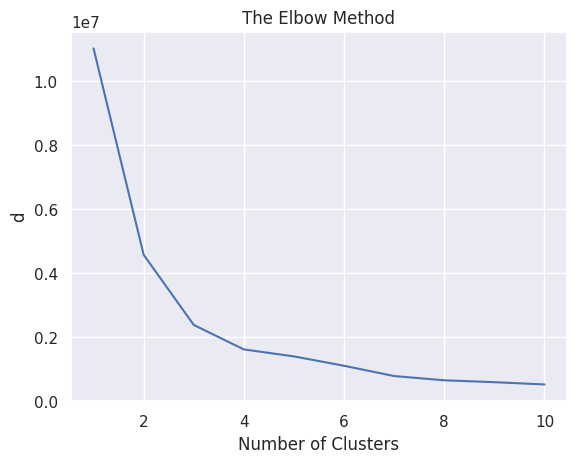

In [21]:
sns.set()
plt.plot(range(1,11),d)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('d')
plt.grid(True)
plt.show()

In [22]:
kmean=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmean.fit_predict(a)

In [23]:
dia['Cluster']=y_pred

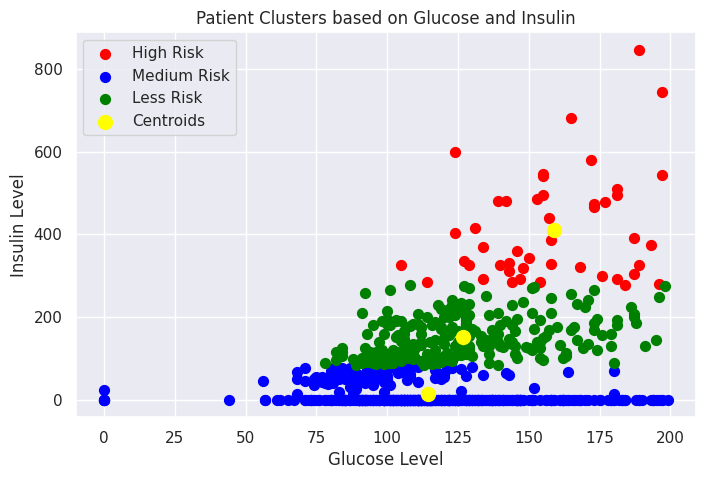

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(a[y_pred==0,0],a[y_pred==0,1],s=50,c='red',label='High Risk')
plt.scatter(a[y_pred==1,0],a[y_pred==1,1],s=50,c='blue',label='Medium Risk')
plt.scatter(a[y_pred==2,0],a[y_pred==2,1],s=50,c='green',label='Less Risk')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Patient Clusters based on Glucose and Insulin')
plt.xlabel('Glucose Level' )
plt.ylabel('Insulin Level')
plt.legend()
plt.show()